In [1]:
import torch


In [2]:
torch.__version__

'1.3.1'

In [3]:
torch.cuda.is_available()

False

In [6]:
torch.version.git_version

'ee77ccbb6da4e2efd83673e798acf7081bc03564'

In [7]:
torch.tensor([1,23,4])

tensor([ 1, 23,  4])

In [9]:
torch.Tensor([1,2,3,4])

tensor([1., 2., 3., 4.])

In [13]:
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [14]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [15]:
torch.rand(3,3)

tensor([[0.8237, 0.1314, 0.8760],
        [0.8484, 0.4223, 0.5803],
        [0.5671, 0.0331, 0.2801]])

In [16]:
t1=torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3],
    [4,4,4,4]
])

In [19]:
t1.shape

torch.Size([4, 4])

In [20]:
t1.reshape(2,8)

tensor([[1, 1, 1, 1, 2, 2, 2, 2],
        [3, 3, 3, 3, 4, 4, 4, 4]])

In [21]:
t1.flatten()

tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

In [27]:
t1.squeeze().unsqueeze(dim=0)

tensor([[[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3],
         [4, 4, 4, 4]]])

##### code ######


In [52]:
import torch 
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [3]:
train_dataset=torchvision.datasets.FashionMNIST(root='/Users/arpithvijaywargiya/Desktop/pytorch',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

 98%|█████████▊| 25985024/26421880 [00:32<00:00, 3682736.78it/s]

Extracting /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw



0it [00:00, ?it/s]


 56%|█████▌    | 16384/29515 [00:00<00:00, 107184.27it/s]
32768it [00:00, 61618.89it/s]                            
0it [00:00, ?it/s]

Extracting /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw



 75%|███████▌  | 3325952/4422102 [00:01<00:00, 1259537.92it/s]
4423680it [00:01, 2530915.26it/s]                             
0it [00:00, ?it/s]

Extracting /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]
8192it [00:00, 25622.44it/s]            

Extracting /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/arpithvijaywargiya/Desktop/pytorch/FashionMNIST/raw
Processing...
Done!


26427392it [00:50, 3682736.78it/s]                              

In [60]:
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=100)

In [61]:
#train_loader

In [62]:
torch.set_printoptions(linewidth=120)

In [63]:
#len(train_dataset)

In [64]:
#print (train_dataset.test_labels)
#train_dataset.test_labels.bincount()


In [67]:
sample=next(iter(train_dataset))
#print (sample)
print (len(sample))
images,labels=sample

2


In [68]:
print (len(sample))#image.shape

2


In [80]:
batch=next(iter(train_loader))
#print (sample)
print (len(batch))
images,labels=batch

2


In [81]:
#image.shape

In [82]:
#label.shape

labels : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


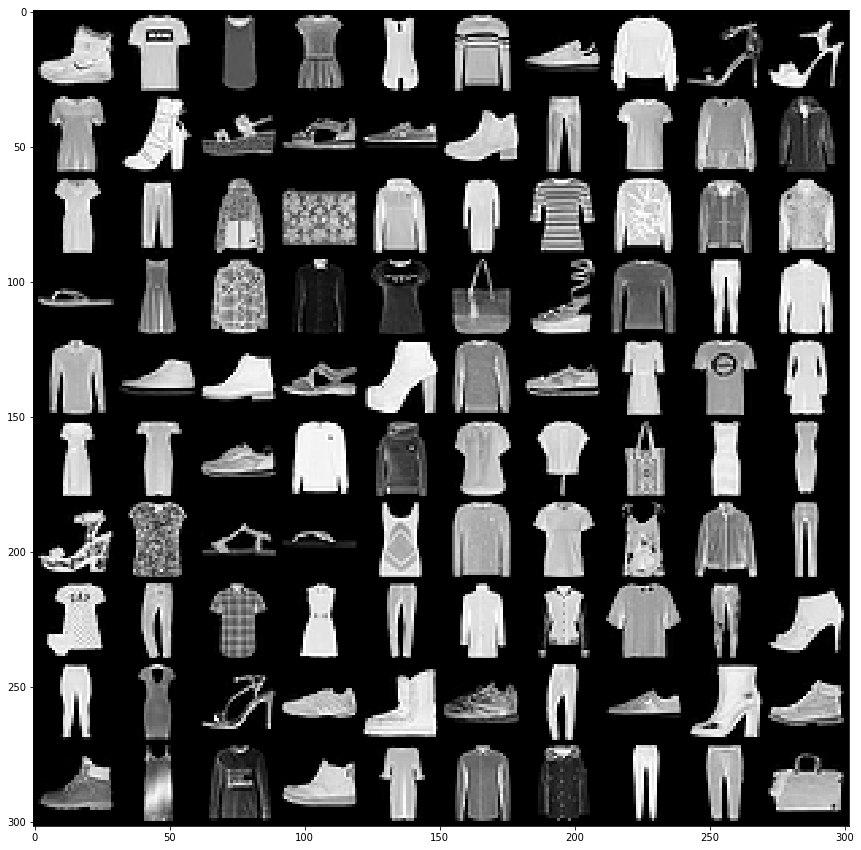

In [84]:
grid= torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print ('labels :', labels)

In [160]:
import torch.nn as nn# neural netwrok 
import torch.nn.functional as F
import torch 
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim # for optimization 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from  torch.utils.tensorboard import SummaryWriter

In [99]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
        
    def forward(self,t):
        #input layer , as input and output dimension remains same 
        t=t
        
        # 2nd layer , 
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        # 3rd layer 
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        # 4th liner layer
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        
        # 5th liner layer
        t=self.fc2(t)
        t=F.relu(t)
        
        # output liner layer
        t=self.out(t)
        
        return t
        
        
        

In [111]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [112]:
torch.set_grad_enabled(True)

In [166]:
network=Network()
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=1000)
optimizer=optim.Adam(network.parameters(),lr=0.01)

batch=next(iter(train_loader))
images,labels=batch

#tensorboard
tb=SummaryWriter()
tb.add_image('images',grid)
tb.add_graph(network,images)

for epoch in range(10):
    total_loss=0
    total_correct = 0

    for batch in train_loader: 
        images,labels=batch

        preds=network(images)
        loss=F.cross_entropy(preds,labels) # calculate loss

        optimizer.zero_grad()# whenever gradiant calculate it adds up the prevuous values as well ,so we need to flush all the previous grd so that everytime it takes new values 
        loss.backward() #claculating gradiant
        optimizer.step() # update weights 

        #--------
        total_loss+=loss.item()
        total_correct += get_num_correct(preds,labels)
        
    tb.add_scalar('Loss',total_loss,epoch)
    tb.add_scalar('Total_correct',total_correct,epoch)
    tb.add_scalar('Accuracy',total_correct/len(train_dataset),epoch)
    tb.add_histogram('conv1.bias',network.conv1.bias,epoch)
    tb.add_histogram('conv1.weight',network.conv1.weight,epoch)
    tb.add_histogram('conv1.weight.grad',network.conv1.weight.grad,epoch)

    print ('epoch {} has total loss {} and total_correct {}'.format(epoch,total_loss,total_correct))
    
    
tb.close()

    



epoch 0 has total loss 55.47012406587601 and total_correct 38551
epoch 1 has total loss 30.585948288440704 and total_correct 48219
epoch 2 has total loss 25.45394903421402 and total_correct 50543
epoch 3 has total loss 22.23228231072426 and total_correct 51733
epoch 4 has total loss 20.47700062394142 and total_correct 52342
epoch 5 has total loss 19.257439255714417 and total_correct 52815
epoch 6 has total loss 18.571683883666992 and total_correct 53029
epoch 7 has total loss 17.577881574630737 and total_correct 53365
epoch 8 has total loss 16.855528444051743 and total_correct 53657
epoch 9 has total loss 16.11750651896 and total_correct 53985


In [140]:
loader=torch.utils.data.DataLoader(train_dataset,batch_size=1000)

In [143]:
@torch.no_grad()
def get_all_preds(model,loader):
    all_preds=torch.tensor([])
    for i in loader:
        image,label=i
        predict=model(image)
        
        #print (predict.shape , predict.argmax(dim=1).shape)
        all_preds=torch.cat((all_preds,predict),dim=0)
        
    return all_preds

In [148]:
cmt=confusion_matrix(train_dataset.targets,get_all_preds(network,loader).argmax(dim=1))

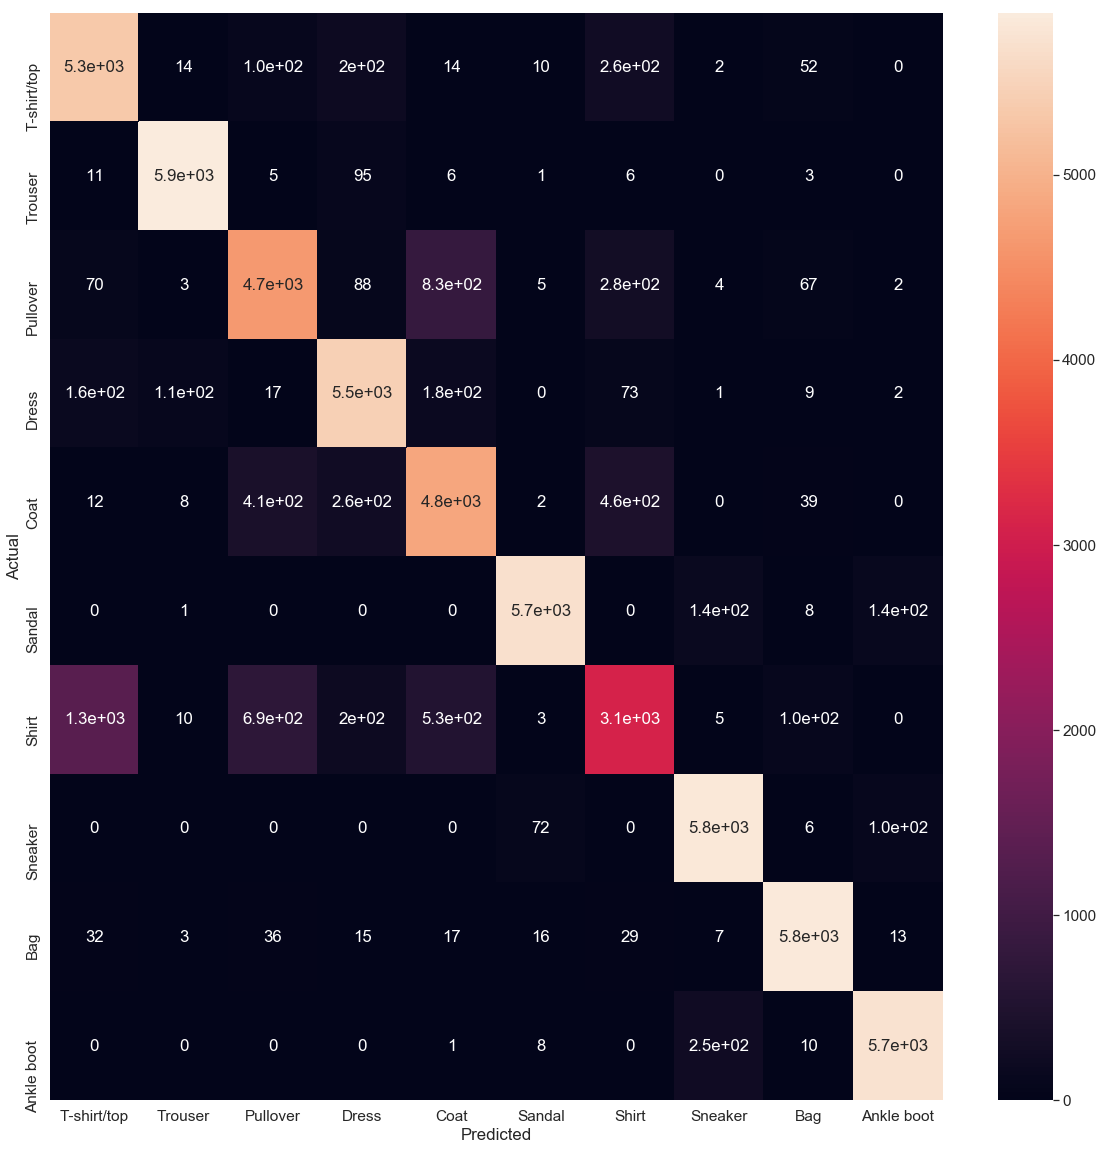

In [158]:
columns=['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']
df_cm = pd.DataFrame(cmt, columns=columns,index=columns)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm,annot=True)

In [86]:
## loss calculation
preds=network(images)
loss=F.cross_entropy(preds,labels)
loss.item()

2.311216354370117

In [87]:
# Calculating Gradients 

In [90]:
print (network.conv1.weight.grad) # as there is no updates is there 

None


In [91]:
loss.backward() # after basckword propogation gradiants will be calculated

In [94]:
print (network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [95]:
# Updsting the weights  (like gradiant decent or adam or SGD)

In [98]:

optimizer.step()

In [115]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
###### clean it ####

In [182]:
import json
with open('/Users/arpithvijaywargiya/Desktop/ngrok-webhook/menus-folder-RJ.json') as f:
    d=json.load(f)
    df=pd.DataFrame(d)

In [183]:
df.shape

(22278, 12)

In [185]:
df.tail()

,city,country,district,latitude,longitude,menu,name,opening_hours,state,street,street_number,unique_id
22273,Japeri,BR,ALECRIM,-22.682801,-43.595976,"[{'name': 'Lanches', 'itens': [{'description':...",Bistro Happy Hour,"[{'dayOfWeek': 'SEG', 'openingTime': 156272760...",RJ,RUA DEDO DE DEUS,0,BRIF00141571
22274,Nova Iguacu,BR,CERAMICA,-22.731853,-43.472908,"[{'name': 'lanches', 'itens': [{'description':...",Nova Burguer,"[{'dayOfWeek': 'QUA', 'openingTime': 156279600...",RJ,R ARISTOTELINA MARIANO DE SOUZA,25,BRIF00141220
22275,Nova Iguacu,BR,VILA SAO LUIS,-22.735300,-43.439090,"[{'name': 'Trios mega lanche', 'itens': [{'des...",Mega Lanches e Refeições,"[{'dayOfWeek': 'QUA', 'openingTime': 156276360...",RJ,RUA SERGIO AZEVEDO,196,BRIF00140717
22276,Cabo Frio,BR,BRAGA,-22.887433,-42.027452,"[{'name': 'Combos', 'itens': [{'description': ...",Panorama Food,"[{'dayOfWeek': 'QUA', 'openingTime': 156278520...",RJ,AV VEREADOR ANTONIO FERREIRA DOS SANTOS,832,BRIF00136832
22277,Rio De Janeiro,BR,JACARE,-22.893910,-43.258046,"[{'name': 'Promoções', 'itens': [{'description...",Pizzaria Rios,"[{'dayOfWeek': 'QUA', 'openingTime': 156278880...",RJ,R LINO TEIXEIRA,263,BRIF00147965


Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=288)

In [178]:
df.transpose()

,city,country,district,latitude,longitude,menu,name,opening_hours,state,street,street_number,unique_id
0,Rio Branco,BR,Bosque,-9.96435,-67.8182,"[{'name': 'Bebidas', 'itens': [{'description':...",Parati Conveniência,"[{'dayOfWeek': 'QUA', 'openingTime': 156277440...",AC,R ISAURA PARENTE,434,BRIF00077661
0,Rio Branco,BR,VILAGE WILDE MACIEL,-9.9581,-67.8202,"[{'name': 'Gelatos', 'itens': [{'description':...",Alítti Gelato e Café,"[{'dayOfWeek': 'QUA', 'openingTime': 156278520...",AC,R IPANEMA,186,BRIF00077387
0,Rio Branco,BR,Floresta Sul,-9.9884,-67.8471,"[{'name': 'Até 70% Off', 'itens': [{'descripti...",Bob's - Via Verde,"[{'dayOfWeek': 'QUA', 'openingTime': 156277440...",AC,EST DA FLORESTA,2320,BRIF00077602
0,Rio Branco,BR,Bosque,-9.96334,-67.8092,"[{'name': 'Pizzas Salgadas', 'itens': [{'descr...",Delesso,"[{'dayOfWeek': 'QUA', 'openingTime': 156279960...",AC,Avenida Nações Unidas,100,BRIF00077399
0,Rio Branco,BR,IPASE,-9.96748,-67.8115,"[{'name': 'Hambúrguers artesanais 180 gramas',...",Apreciato,"[{'dayOfWeek': 'QUA', 'openingTime': 156277440...",AC,Silvestre Coelho,333,BRIF00077395
0,Rio Branco,BR,CONJUNTO PROCON,-9.94698,-67.8216,"[{'name': 'Promoção do dia', 'itens': [{'descr...",Dom Pedrito Carne de Sol e Restaurante,"[{'dayOfWeek': 'QUA', 'openingTime': 156277080...",AC,Rua Benedito Maia,35,BRIF00077610
0,Rio Branco,BR,Jardim de Alah,-9.96081,-67.8557,"[{'name': 'Bebidas', 'itens': [{'description':...",Churrascaria da Vovó,"[{'dayOfWeek': 'QUA', 'openingTime': 156277440...",AC,Estrada Dias Martins,1481,BRIF00077638
0,Rio Branco,BR,CONJUNTO OSCAR PASSOS,-9.95349,-67.8008,[],Delícias dos Queridinhos,"[{'dayOfWeek': 'QUA', 'openingTime': 156276360...",AC,AV DOUTOR MARIO MAIA,329,BRIF00077645
0,Rio Branco,BR,Vila Acre,-9.97123,-67.8088,"[{'name': 'Lanches ', 'itens': [{'description'...",El Shaday da Vila Acre,"[{'dayOfWeek': 'QUA', 'openingTime': 156277080...",AC,Rodovia Ac 40 N,2428,BRIF00077491
0,Rio Branco,BR,BOSQUE,-9.96285,-67.8121,"[{'name': 'Bebidas', 'itens': [{'description':...",Xandy Espetinhos Bosque,"[{'dayOfWeek': 'QUA', 'openingTime': 156277080...",AC,Rua Alvorada,182,BRIF00077626
